# KE5105 - Building Electrical Consumption Forecasting

# Extract, Transform and Load Data 8 - Data Transformation

## Summary of Findings

* All zero values in the cumulative PWM data are assumed to be outliers.
* SDE-2_May2015.csv was removed from the dataset because the columns names were different from the other files for SDE-2.
* In EA_May2015.csv and E4_May2015.csv for May 2015, the column names were changed to match the column names in the other files for the two buildings.

## Load libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import myUtilities as mu
import os
import json

## Outliers in the Cumulative PWM Data

In [2]:
sde3_df = mu.load_data_by_bldg(['SDE-3'], 'combined')
sde3_df[0][1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46440 entries, 2015-06-01 00:00:00 to 2018-12-03 14:30:00
Data columns (total 13 columns):
PWMSDE3IC1             44179 non-null float64
PWMSDE3IC2             44179 non-null float64
PWMSDE3MCC(AC)         44179 non-null float64
PWMCELCIC1             45496 non-null float64
PWMCELCIC2             45496 non-null float64
PWMSDE1                46317 non-null float64
PWMSDE2SSB             46389 non-null float64
PWMSDE2AC              46389 non-null float64
PWMSDE3Ext             46317 non-null float64
PWMStreetLight         44179 non-null float64
BTUSDE3ChillerPlant    43986 non-null float64
BTUSDE32               43986 non-null float64
BTUSDE31&2             43987 non-null float64
dtypes: float64(13)
memory usage: 5.0 MB


There zero values in the cumulative data. From the plot, we can reasonably make the assumption that these zero values are erroneous, given that values before and after those zero values appear to follow a linear trend.

In [3]:
pwm_streetlight = sde3_df[0][1].loc['2018-06-16 00H':, 'PWMStreetLight']
pwm_streetlight

Pt_timeStamp
2018-06-16 00:00:00    3500.29
2018-06-16 00:30:00    3500.51
2018-06-16 01:00:00        NaN
2018-06-16 01:30:00        NaN
2018-06-16 02:00:00    3501.18
2018-06-16 02:30:00    3501.41
2018-06-16 03:00:00    3501.63
2018-06-16 03:30:00    3501.86
2018-06-16 04:00:00    3502.08
2018-06-16 04:30:00    3502.30
2018-06-16 05:00:00    3502.53
2018-06-16 05:30:00    3502.75
2018-06-16 06:00:00    3502.97
2018-06-16 06:30:00    3503.19
2018-06-16 07:00:00        NaN
2018-06-16 07:30:00        NaN
2018-06-16 08:00:00    3503.42
2018-06-16 08:30:00    3503.42
2018-06-16 09:00:00    3503.42
2018-06-16 09:30:00    3503.42
2018-06-16 10:00:00    3503.42
2018-06-16 10:30:00    3503.42
2018-06-16 11:00:00    3503.42
2018-06-16 11:30:00    3503.42
2018-06-16 12:00:00    3503.42
2018-06-16 12:30:00    3503.42
2018-06-16 13:00:00        NaN
2018-06-16 13:30:00        NaN
2018-06-16 14:00:00    3503.42
2018-06-16 14:30:00    3503.42
                        ...   
2018-12-03 00:00:00    444

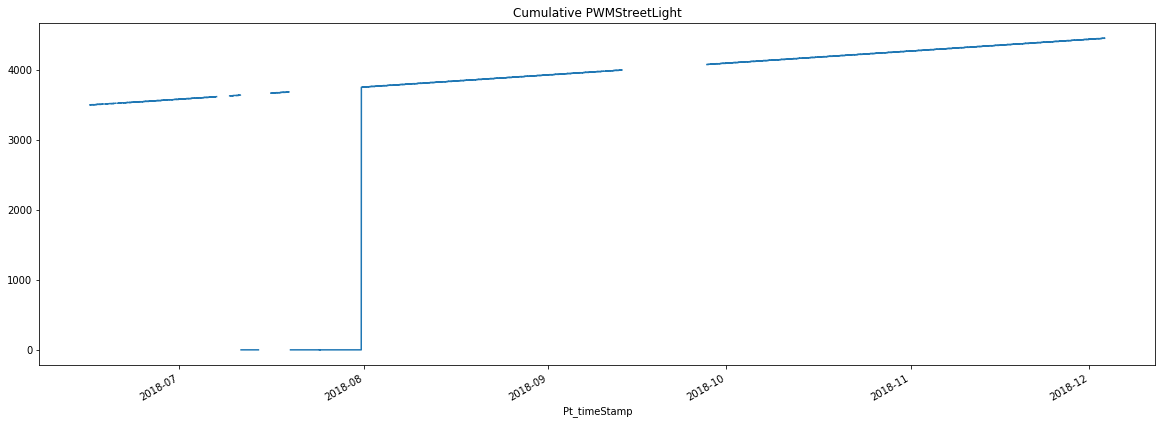

In [4]:
sde3_df[0][1].loc['2018-06-16 00H':, 'PWMStreetLight'].plot(figsize=(20, 7), title='Cumulative PWMStreetLight')

The zero values (below) before the value '3753.32' are **outliers**.

In [5]:
sde3_df[0][1].loc['2018-07-31 00H':, 'PWMStreetLight']

Pt_timeStamp
2018-07-31 00:00:00       0.00
2018-07-31 00:30:00       0.00
2018-07-31 01:00:00       0.00
2018-07-31 01:30:00       0.00
2018-07-31 02:00:00       0.00
2018-07-31 02:30:00       0.00
2018-07-31 03:00:00       0.00
2018-07-31 03:30:00       0.00
2018-07-31 04:00:00       0.00
2018-07-31 04:30:00       0.00
2018-07-31 05:00:00       0.00
2018-07-31 05:30:00       0.00
2018-07-31 06:00:00       0.00
2018-07-31 06:30:00       0.00
2018-07-31 07:00:00       0.00
2018-07-31 07:30:00       0.00
2018-07-31 08:00:00       0.00
2018-07-31 08:30:00       0.00
2018-07-31 09:00:00       0.00
2018-07-31 09:30:00       0.00
2018-07-31 10:00:00       0.00
2018-07-31 10:30:00       0.00
2018-07-31 11:00:00       0.00
2018-07-31 11:30:00       0.00
2018-07-31 12:00:00       0.00
2018-07-31 12:30:00       0.00
2018-07-31 13:00:00       0.00
2018-07-31 13:30:00       0.00
2018-07-31 14:00:00       0.00
2018-07-31 14:30:00       0.00
                        ...   
2018-12-03 00:00:00    444

## Transform combined building cumulative data

In [6]:
mu.process_PWM_data_by_bldg(['SDE-3', 'MD6'])

True

In [7]:
bldg_df_list = mu.load_data_by_bldg(['SDE-3', 'MD6'], 'processed')

## SDE-3

In [8]:
bldg_df_list[0][0]

In [9]:
bldg_df_list[0][1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64368 entries, 2015-05-01 00:00:00 to 2018-12-31 23:30:00
Data columns (total 29 columns):
PWMSDE3IC1                       44178 non-null float64
PWMSDE3IC2                       44178 non-null float64
PWMSDE3MCC(AC)                   44178 non-null float64
PWMCELCIC1                       45494 non-null float64
PWMCELCIC2                       45494 non-null float64
PWMSDE1                          46309 non-null float64
PWMSDE2SSB                       46384 non-null float64
PWMSDE2AC                        46384 non-null float64
PWMSDE3Ext                       46309 non-null float64
PWMStreetLight                   44178 non-null float64
BTUSDE3ChillerPlant              43985 non-null float64
BTUSDE32                         43985 non-null float64
BTUSDE31&2                       43986 non-null float64
PWMSDE3IC1_30min_avg             42805 non-null float64
PWMSDE3IC2_30min_avg             42802 non-null float64
PWMSDE3MCC(AC)_3

The PWMStreetLight_30min_avg are correctly differenced. From 8:30 to 10:30, the values are **zero**; from 17:00 onwards, the values are **NaN**.

In [10]:
bldg_df_list[0][1].loc['2018-07-19 00H':'2018-07-19 23H', ['PWMStreetLight', 'PWMStreetLight_30min_avg']]

,PWMStreetLight,PWMStreetLight_30min_avg
2018-07-19 00:00:00,3682.89,0.24
2018-07-19 00:30:00,3683.12,0.23
2018-07-19 01:00:00,NaN,NaN
2018-07-19 01:30:00,NaN,NaN
2018-07-19 02:00:00,3683.82,NaN
2018-07-19 02:30:00,3684.06,0.24
2018-07-19 03:00:00,3684.29,0.23
2018-07-19 03:30:00,3684.53,0.24
2018-07-19 04:00:00,3684.76,0.23
2018-07-19 04:30:00,3685.00,0.24


In [11]:
sde3_PWM30_columns = []
for i in bldg_df_list[0][1].columns:
    if ('PWM' in i) & ('30' in i):
        sde3_PWM30_columns.append(i)
sde3_PWM30_columns

['PWMSDE3IC1_30min_avg',
 'PWMSDE3IC2_30min_avg',
 'PWMSDE3MCC(AC)_30min_avg',
 'PWMCELCIC1_30min_avg',
 'PWMCELCIC2_30min_avg',
 'PWMSDE1_30min_avg',
 'PWMSDE2SSB_30min_avg',
 'PWMSDE2AC_30min_avg',
 'PWMSDE3Ext_30min_avg',
 'PWMStreetLight_30min_avg',
 'PWM_30min_avg']

For the NaN values in PWMStreetLight_30min_avg (below), PWM_30min_avg is also NaN. 

In [12]:
bldg_df_list[0][1].loc['2018-07-19 00H':'2018-07-19 23H', ['PWMStreetLight_30min_avg', 'PWM_30min_avg']]

,PWMStreetLight_30min_avg,PWM_30min_avg
2018-07-19 00:00:00,0.24,NaN
2018-07-19 00:30:00,0.23,NaN
2018-07-19 01:00:00,NaN,NaN
2018-07-19 01:30:00,NaN,NaN
2018-07-19 02:00:00,NaN,NaN
2018-07-19 02:30:00,0.24,NaN
2018-07-19 03:00:00,0.23,NaN
2018-07-19 03:30:00,0.24,NaN
2018-07-19 04:00:00,0.23,NaN
2018-07-19 04:30:00,0.24,NaN


All the PWM_30min_avg values (below) are NaN after Mar 2017.

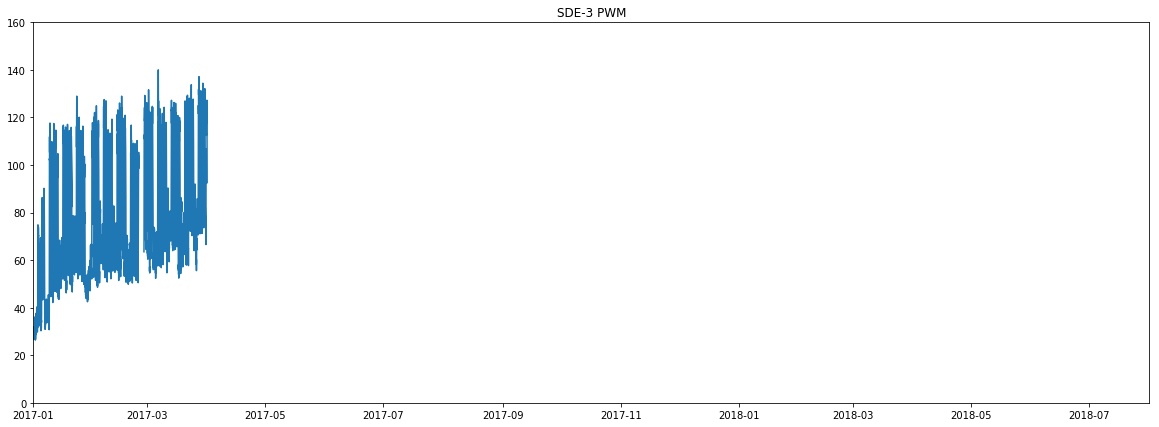

In [13]:
# bldg_df_list[0][1].loc['2017-01-01 00H':'2018-07-31 23H', 'PWM_30min_avg'].plot(figsize=(20, 7),
#                                                                                    title='SDE-3 PWM in 2018')
plt.figure(figsize=(20, 7))
plt.plot(bldg_df_list[0][1].loc['2017-01-01 00H':'2018-07-31 23H', 'PWM_30min_avg'])
plt.title('SDE-3 PWM')
plt.axis(['2017-01-01 00H', '2018-07-31 23H', 0, 160])
plt.show()

PWM_sumsubtract (below) is NaN; some of its attribute columns are NaN. This is like because the cumulative values before differencing are zero.

In [14]:
bldg_df_list[0][1].loc['2018-07-19 00H':'2018-07-19 23H', ['PWM_sumadd', 'PWM_sumsubtract', 'PWM_30min_avg']]

,PWM_sumadd,PWM_sumsubtract,PWM_30min_avg
2018-07-19 00:00:00,88.45,NaN,NaN
2018-07-19 00:30:00,88.87,NaN,NaN
2018-07-19 01:00:00,NaN,NaN,NaN
2018-07-19 01:30:00,NaN,NaN,NaN
2018-07-19 02:00:00,NaN,NaN,NaN
2018-07-19 02:30:00,88.56,NaN,NaN
2018-07-19 03:00:00,88.87,NaN,NaN
2018-07-19 03:30:00,87.82,NaN,NaN
2018-07-19 04:00:00,89.18,NaN,NaN
2018-07-19 04:30:00,87.38,NaN,NaN


PWMSDE3MCC(AC) is zero throughout 2018.

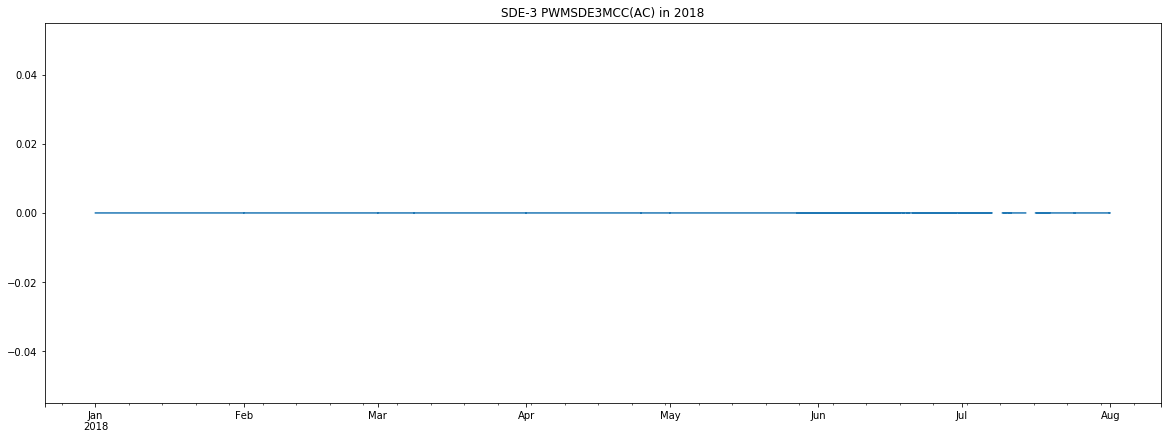

In [15]:
bldg_df_list[0][1].loc['2018-01-01 00H':'2018-07-31 23H', 'PWMSDE3MCC(AC)'].plot(figsize=(20, 7),
                                                                                   title='SDE-3 PWMSDE3MCC(AC) in 2018')

## MD6

In [16]:
bldg_df_list[1][0]

'MD6'

In [17]:
bldg_df_list[1][1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36506 entries, 2016-12-01 11:00:00 to 2018-12-31 23:30:00
Data columns (total 13 columns):
PWMTF1                   21392 non-null float64
PWMTF3                   21392 non-null float64
PWMTF5                   21392 non-null float64
PWMMCC02IC1              21392 non-null float64
PWMMCC02IC2              21392 non-null float64
PWMTF1_30min_avg         21369 non-null float64
PWMTF3_30min_avg         21369 non-null float64
PWMTF5_30min_avg         21369 non-null float64
PWMMCC02IC1_30min_avg    21369 non-null float64
PWMMCC02IC2_30min_avg    21368 non-null float64
PWM_sumadd               21369 non-null float64
PWM_sumsubtract          21368 non-null float64
PWM_30min_avg            21368 non-null float64
dtypes: float64(13)
memory usage: 3.9 MB


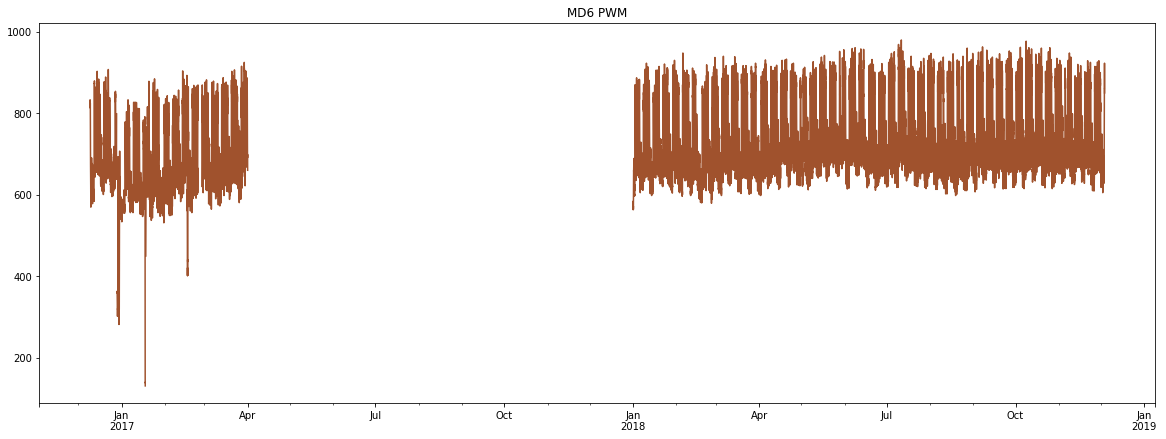

In [18]:
bldg_df_list[1][1].loc[:, 'PWM_30min_avg'].plot(figsize=(20, 7), title='MD6 PWM', color='sienna')

There are two potential outliers (below) in the PWM_30min_avg values.

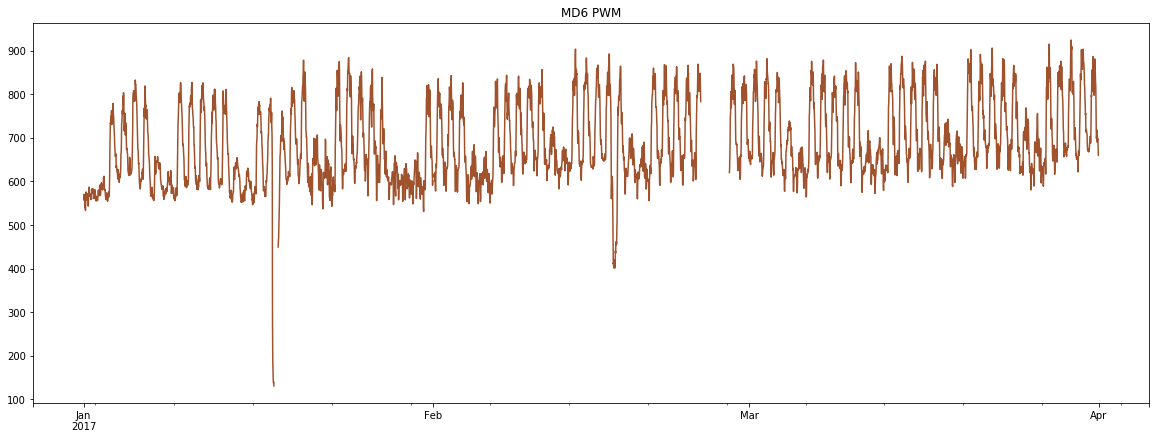

In [19]:
bldg_df_list[1][1].loc['2017-01-01 00H':'2017-03-31 23H', 'PWM_30min_avg'].plot(figsize=(20, 7), title='MD6 PWM', color='sienna')

In [20]:
md6_PWM30_columns = []
for i in bldg_df_list[1][1].columns:
    if ('PWM' in i) & ('30' in i):
        md6_PWM30_columns.append(i)
md6_PWM30_columns

['PWMTF1_30min_avg',
 'PWMTF3_30min_avg',
 'PWMTF5_30min_avg',
 'PWMMCC02IC1_30min_avg',
 'PWMMCC02IC2_30min_avg',
 'PWM_30min_avg']

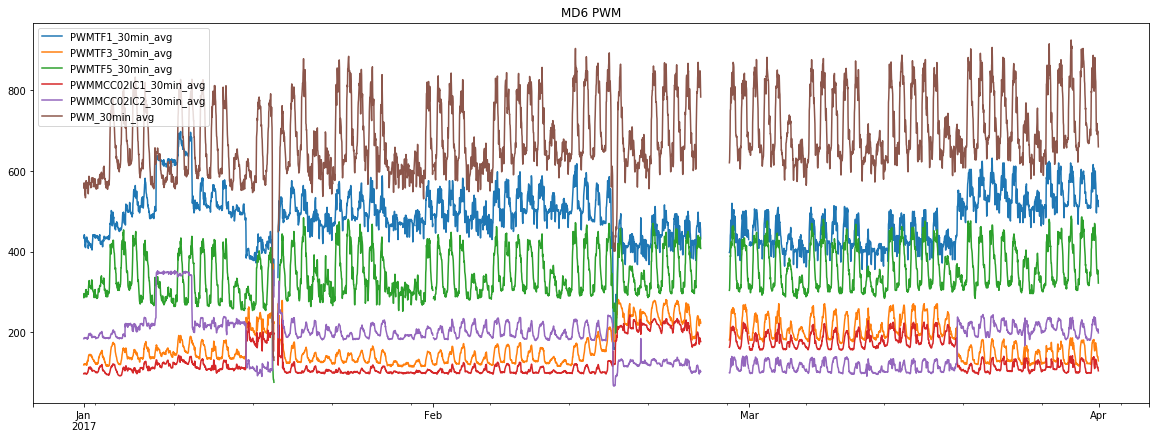

In [21]:
bldg_df_list[1][1].loc['2017-01-01 00H':'2017-03-31 23H', md6_PWM30_columns].plot(figsize=(20, 7), title='MD6 PWM')

### First "Outlier"

The variations in the data (below) do not show any obvious erroneous values.

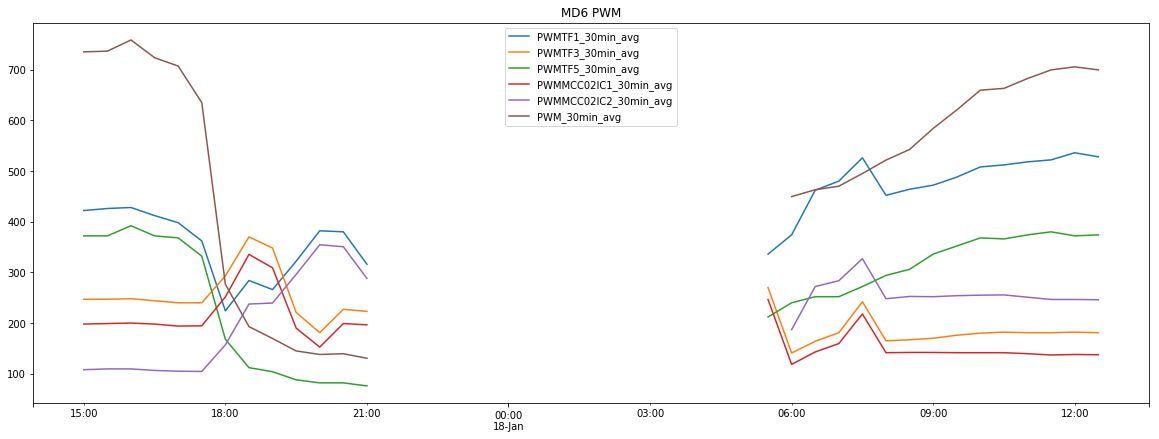

In [22]:
bldg_df_list[1][1].loc['2017-01-17 15H':'2017-01-18 12H', md6_PWM30_columns].plot(figsize=(20, 7), title='MD6 PWM')

The cumulative data (below) also do not show any erroneous values. PWMMCC02IC2 has an outlier zero value at 5:00 without which its plot will resemble the other plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f009d7daf28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f009d6d5898>]], dtype=object)

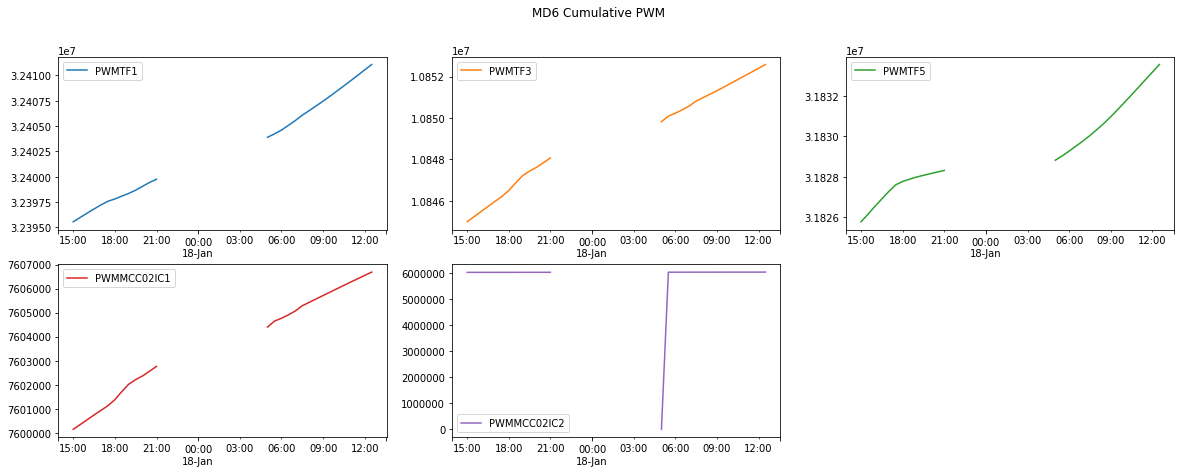

In [23]:
bldg_df_list[1][1].loc['2017-01-17 15H':'2017-01-18 12H', ['PWMTF1', 'PWMTF3', 'PWMTF5', 'PWMMCC02IC1', 'PWMMCC02IC2']].plot(
    subplots=True, layout=(2, 3), figsize=(20, 7), sharex=False, title='MD6 Cumulative PWM')

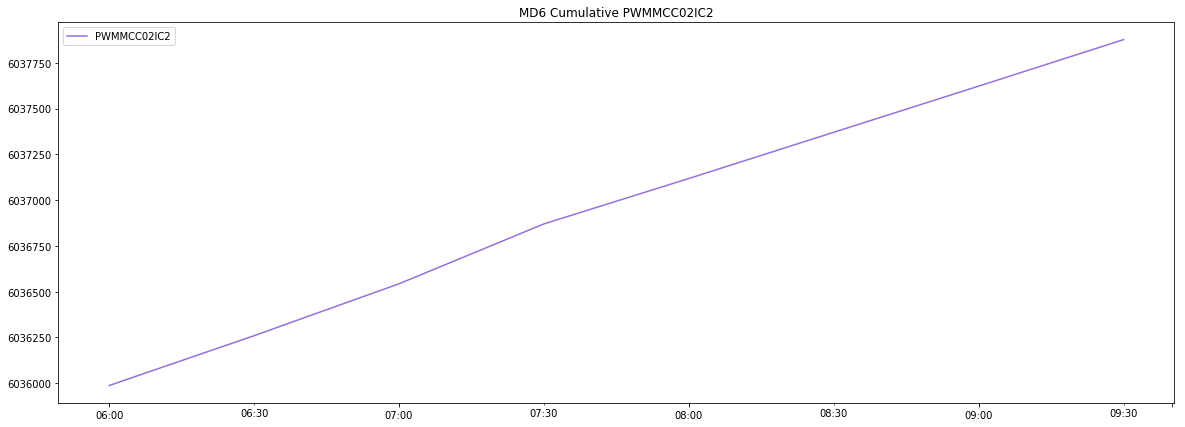

In [24]:
bldg_df_list[1][1].loc['2017-01-18 06H':'2017-01-18 09H', ['PWMMCC02IC2']].plot(
    figsize=(20, 7), title='MD6 Cumulative PWMMCC02IC2', color='mediumpurple')

### Second "Outlier"

The variations in the data (below) do not show any obvious erroneous values.

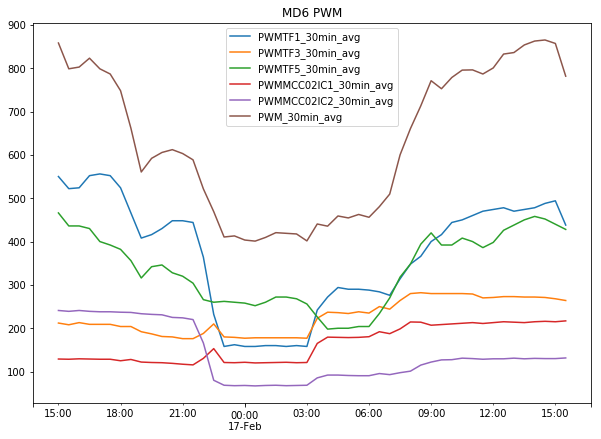

In [25]:
bldg_df_list[1][1].loc['2017-02-16 15H':'2017-02-17 15H', md6_PWM30_columns].plot(figsize=(10, 7), title='MD6 PWM')

## Preparation for Data Transformation

Extract the column names from all the csv files to facilitate the encoding of the various building PWM aggregation formulas.

In [26]:
# Get the column names from each csv file and add to a dictionary.
files = os.listdir(os.path.join('source', 'combined_bldg_data'))
cols = {}
for i in files:
    print(i)
    df = pd.read_csv(os.path.join('source', 'combined_bldg_data', i), index_col=0, nrows=0)
    a_list = [ j + '_30min_avg' for j in df.columns.tolist() ]
    cols[i.split('.')[0]] = a_list

Central Library Annex.csv
SDE-1.csv
Eusoff Hall.csv
E3.csv
MD6.csv
Create.csv
Computer Center.csv
E1.csv
S1.csv
AS5.csv
Cinnamon.csv
Li Ka Shing Building.csv
SRC.csv
S17.csv
CAPT.csv
OTH.csv
S6.csv
S13.csv
Dentistry.csv
AS4.csv
AS1.csv
E3A.csv
MD9.csv
PGPR.csv
HSE15.csv
ERC.csv
EA.csv
I-Cube.csv
LKCNHM.csv
T-Lab.csv
Sheares Hall.csv
MD2.csv


OCS.csv
MD10.csv
Sports and Recreation Center.csv
CJK Law Library.csv
S8.csv
S12.csv
S11.csv
Tower Block.csv
CELS.csv
MD4andMD4a.csv
NUS Museum.csv
AS3.csv
S16.csv
Ventus.csv
E2.csv
University Hall.csv
S15.csv
SSLS.csv
EW2.csv
S1A.csv
EDIC.csv
MD1.csv
COM1.csv
Federal Building.csv
SDE-2.csv
S5.csv
SDE-3.csv
Kuok Foundation House.csv
HSSML.csv
Temasek Hall.csv
S4A.csv
AS2.csv
KR Hall.csv
Central Library.csv
E4.csv
EW1.csv
COM2.csv
CELC.csv
Tembusu.csv
Alumni House.csv
S3.csv
MD11.csv
RC4.csv
E5.csv
E1A.csv
KE 7 Hall.csv


Ridge View.csv
MM Building.csv
MD3.csv
MD7.csv
Brenner Center of Molecular Medicine.csv
Ridge View Residence.csv
NUS Centre of Arts.csv
E4A.csv
S2S.csv
UHC.csv
S10.csv
AS6.csv
ETS Building.csv
Graduate Residence.csv
BIZ 2.csv
S4.csv
Block B.csv
AS7.csv
Yusoff Ishak House.csv
AS8.csv
Raffles Hall.csv
Yong Siew Toh Conservatory of Music.csv
MRB.csv
S14.csv
S7.csv
ISS.csv
S2.csv


In [27]:
cols['AS1']

['PWMAS1ExtgBR2_30min_avg', 'BTUAS1_30min_avg', 'BTUAS4B_30min_avg']

In [28]:
cols.keys()

dict_keys(['Central Library Annex', 'SDE-1', 'Eusoff Hall', 'E3', 'MD6', 'Create', 'Computer Center', 'E1', 'S1', 'AS5', 'Cinnamon', 'Li Ka Shing Building', 'SRC', 'S17', 'CAPT', 'OTH', 'S6', 'S13', 'Dentistry', 'AS4', 'AS1', 'E3A', 'MD9', 'PGPR', 'HSE15', 'ERC', 'EA', 'I-Cube', 'LKCNHM', 'T-Lab', 'Sheares Hall', 'MD2', 'OCS', 'MD10', 'Sports and Recreation Center', 'CJK Law Library', 'S8', 'S12', 'S11', 'Tower Block', 'CELS', 'MD4andMD4a', 'NUS Museum', 'AS3', 'S16', 'Ventus', 'E2', 'University Hall', 'S15', 'SSLS', 'EW2', 'S1A', 'EDIC', 'MD1', 'COM1', 'Federal Building', 'SDE-2', 'S5', 'SDE-3', 'Kuok Foundation House', 'HSSML', 'Temasek Hall', 'S4A', 'AS2', 'KR Hall', 'Central Library', 'E4', 'EW1', 'COM2', 'CELC', 'Tembusu', 'Alumni House', 'S3', 'MD11', 'RC4', 'E5', 'E1A', 'KE 7 Hall', 'Ridge View', 'MM Building', 'MD3', 'MD7', 'Brenner Center of Molecular Medicine', 'Ridge View Residence', 'NUS Centre of Arts', 'E4A', 'S2S', 'UHC', 'S10', 'AS6', 'ETS Building', 'Graduate Residence

In [29]:
# Save to json file.
with open(os.path.join('source', 'other_data', 'bldg-columns.json'), 'w') as outfile:
    json.dump(cols, outfile)

## Other Changes

* SDE-2_May2015.csv was removed from the dataset because the columns names were different from the other files for SDE-2

In [30]:
sde2may2015 = pd.read_csv(os.path.join('source', '105 building data_v0', 'May_2015', 'SDE-2_May2015.csv'), index_col=0, nrows=0)
sde2may2015

,BTU SDE 2,PWM SDE 2 AC,PWM SDE 2 MSB,PWM SDE 2 SSB
Pt_timeStamp,,,,


In [31]:
sde2jun2015 = pd.read_csv(os.path.join('source', '105 building data_v0', 'Jun_2015', 'SDE-2_Jun2015.csv'), index_col=0, nrows=0)
sde2jun2015

,PWM-SDE2 SSB,BTU-SDE2
Pt_timeStamp,,


* In EA_May2015.csv and E4_May2015.csv for May 2015, the column names were changed to match the column names in the other files for the two buildings (see example using EA below)

In [32]:
eamay2015 = pd.read_csv(os.path.join('source', '105 building data_v0', 'May_2015', 'EA_May2015.csv'), index_col=0, nrows=0)
eamay2015

,EA IC 1,EA IC 2
Pt_timeStamp,,


In [33]:
eajun2015 = pd.read_csv(os.path.join('source', '105 building data_v0', 'Jun_2015', 'EA_Jun2015.csv'), index_col=0, nrows=0)
eajun2015

,PWM-Main IC1,PWM-Main IC2,BTU-EA-1,BTU-EA-2,BTU-E3A LEVEL2
Pt_timeStamp,,,,,
